# Loading and Cleaning data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for col in df.columns:
    print(df[col].dtype)
    print(df[col].value_counts())
    print()

object
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

object
gender
Male      3555
Female    3488
Name: count, dtype: int64

int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

object
Partner
No     3641
Yes    3402
Name: count, dtype: int64

object
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

object
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

object
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

object
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

object
OnlineSecurity
No  

In [ ]:
df.TotalCharges = df.TotalCharges.replace(' ',np.nan)
df.TotalCharges = df.TotalCharges.astype('float64')

In [ ]:
# view the categorical columns
categoricals = []
for col in df.columns:
    if df[col].nunique() < 5:
        categoricals.append(col)
categoricals

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
df[categoricals] = df[categoricals].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
# we can drop customer id column
df.drop('customerID',inplace=True,axis=1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Explorartory Data Analysis

## Check data imbalance

,proportion
Churn,
No,0.73463
Yes,0.26537


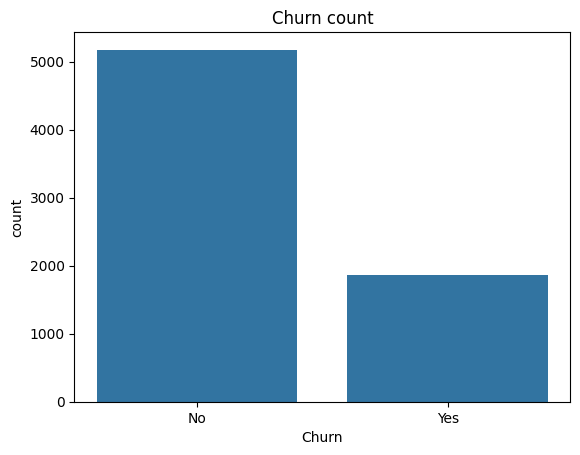

In [ ]:
sns.countplot(data=df, x='Churn')
plt.title('Churn count')
plt.plot()

df['Churn'].value_counts(normalize=True)

## Relationship with Numerical continuous columns

### TotalCharges

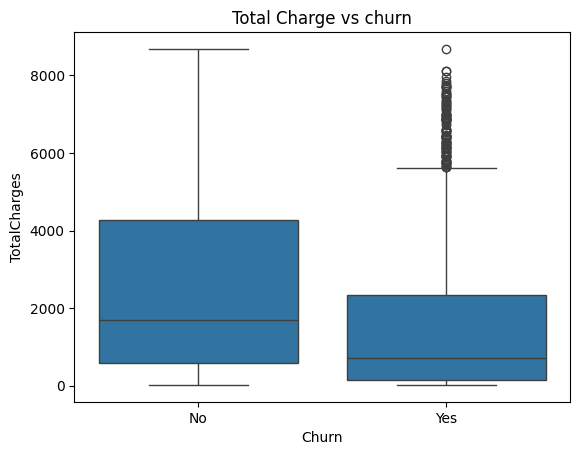

In [ ]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charge vs churn')
plt.show()

### MonthlyCharges

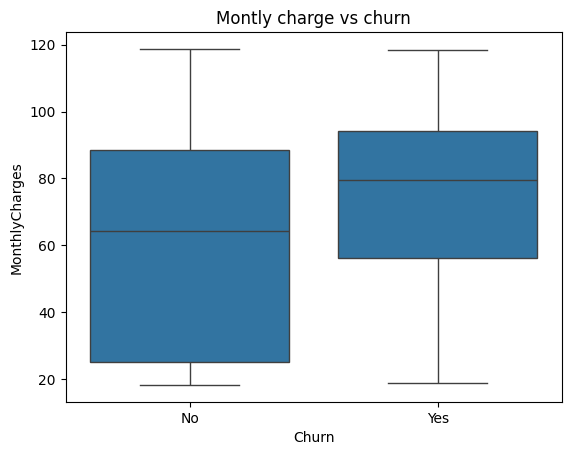

In [ ]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Montly charge vs churn')
plt.show()

### Tenure

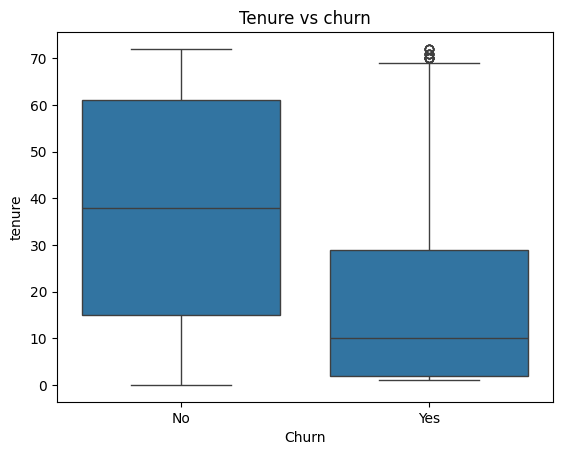

In [ ]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs churn')
plt.show()

**So, from analysing the three numerical columns, we have the following insights**
1. People who stayed have paid more total fees (obviously). But there are also some people who have paid a lot of total charge, but still have left.
2. People who have churned, have clearly had a higher monthly fee. Thus high monthly fee could be a possible reason for churn
3. People who have stayed for longer are less probable to leave. These are the loyal customers. But we do have some people who have churned even after being a customer for a really long time.

## Categorical Columns

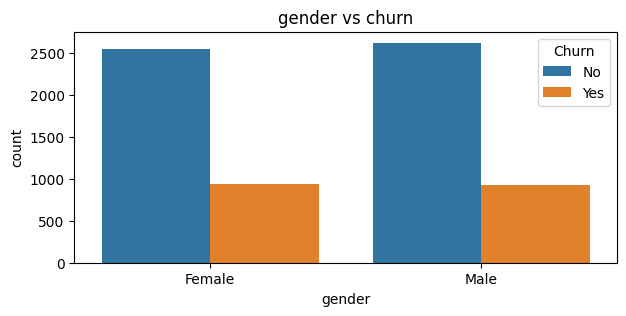

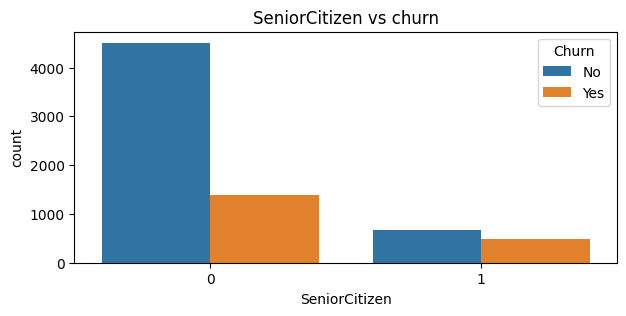

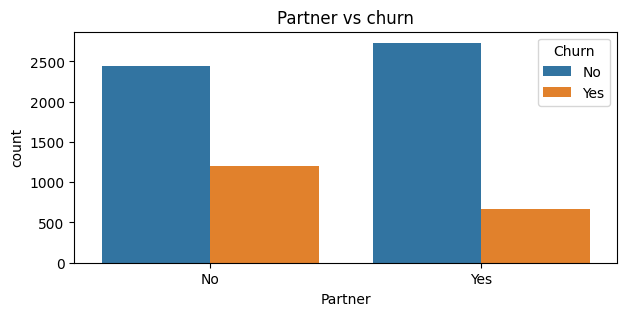

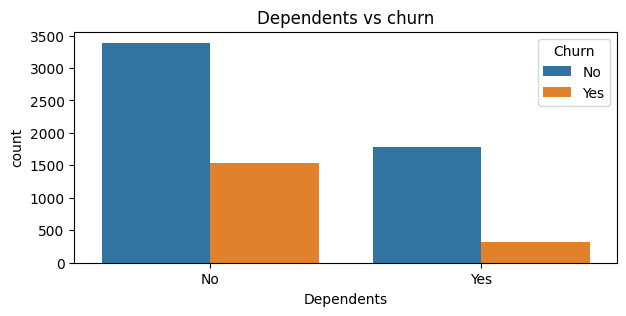

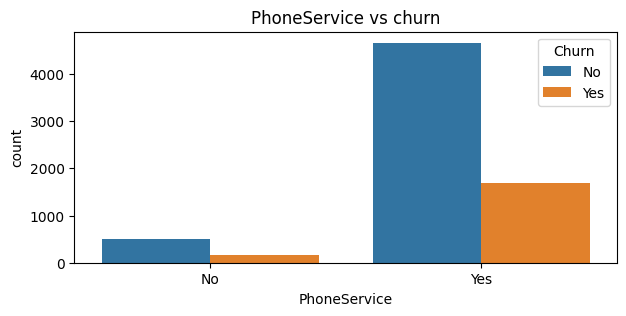

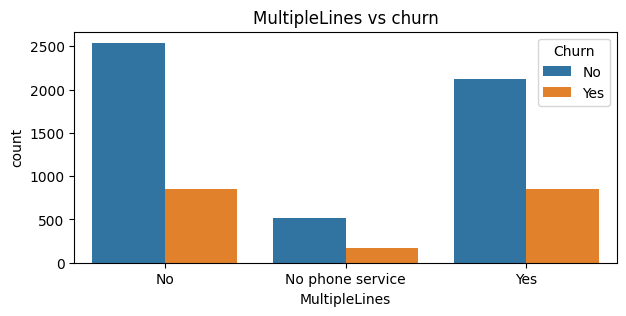

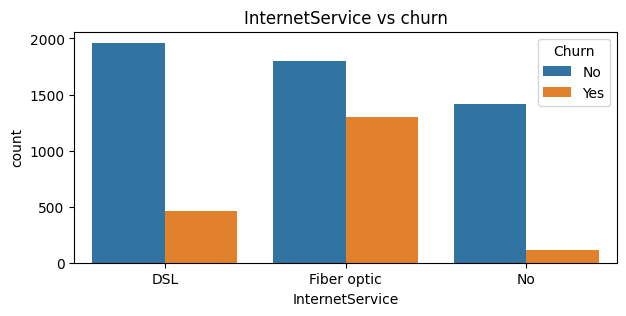

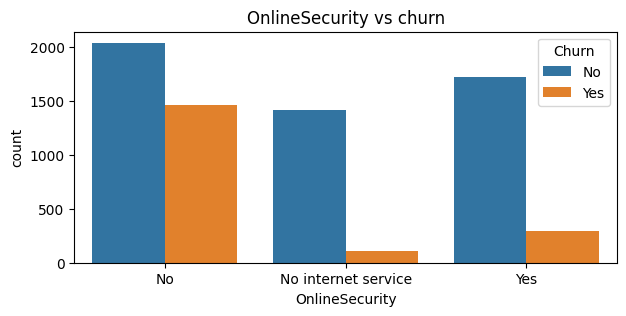

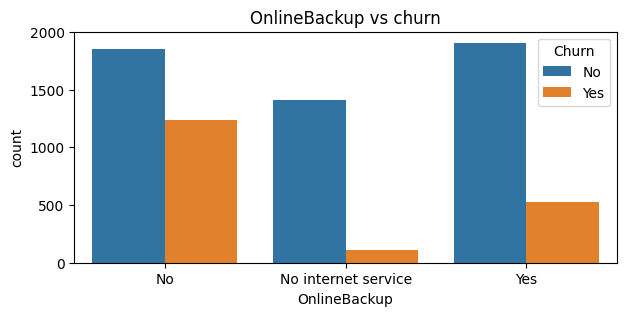

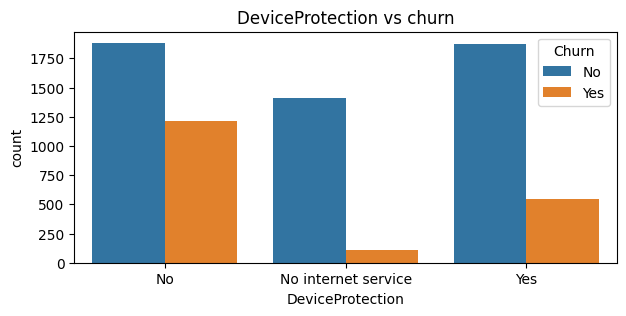

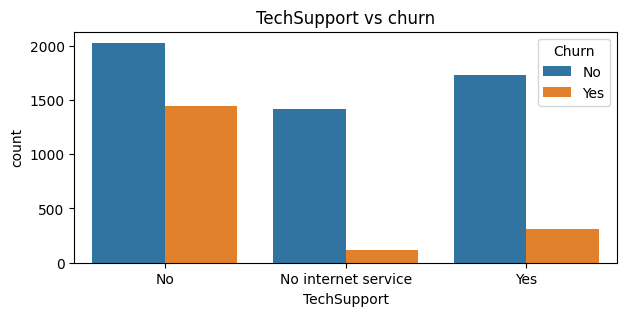

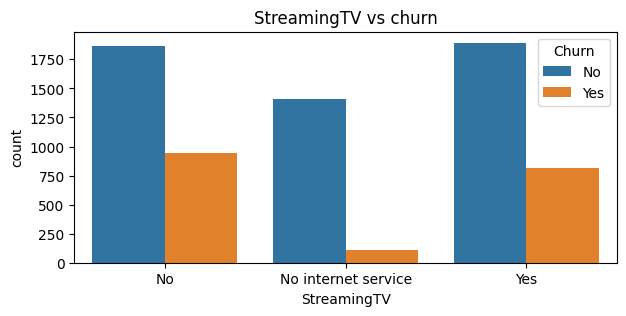

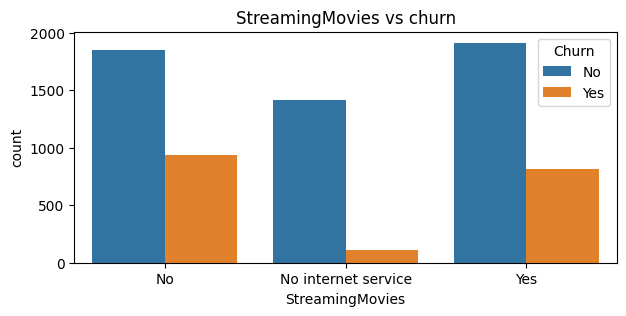

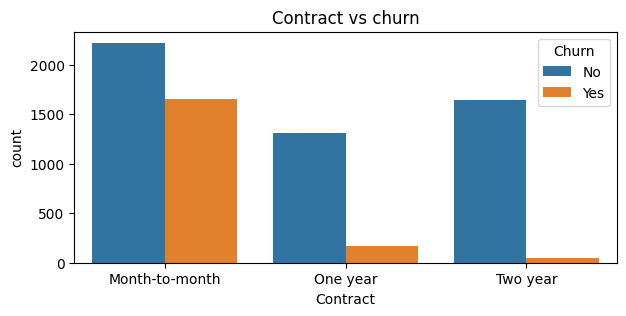

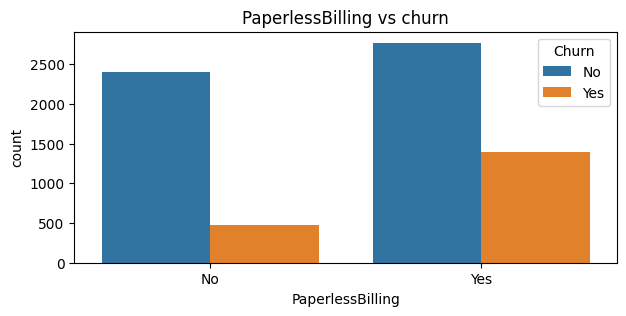

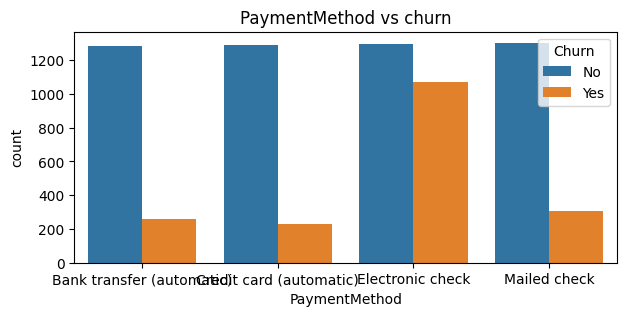

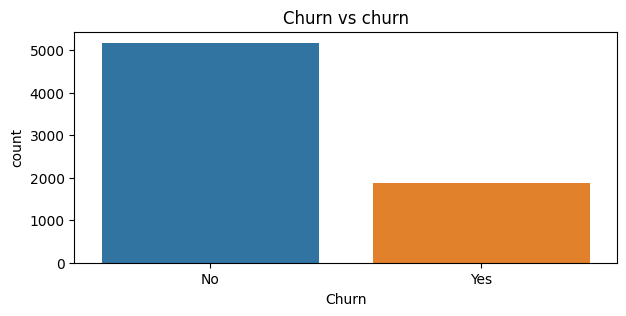

In [ ]:
for col in categoricals:
    plt.figure(figsize = (7,3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs churn')
    plt.show()
    print()

<h2>Based on the visualisations and business perspectives, here are a few categories that have a strong correlation to churn rates</h2>

1. Internet Service - Fibre optics customers tend to churn
2. Online Security - Those without online security tend to churn
3. Tech Support - Those without tech support tend to churn
4. Contract - Month-to-month contract curtomers tend to churn
5. Billing Methods - Electronic check receivers tend to churn

# Model Preparation

## Simple Random Forest Classifier

In [ ]:
# Step 1: Extract the data
features = ['tenure','MonthlyCharges','InternetService','OnlineSecurity','TechSupport','Contract','PaymentMethod']
X,y = df[features],df.Churn
X.head()

,tenure,MonthlyCharges,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,1,29.85,DSL,No,No,Month-to-month,Electronic check
1,34,56.95,DSL,Yes,No,One year,Mailed check
2,2,53.85,DSL,Yes,No,Month-to-month,Mailed check
3,45,42.30,DSL,Yes,Yes,One year,Bank transfer (automatic)
4,2,70.70,Fiber optic,No,No,Month-to-month,Electronic check


In [ ]:
# Step 2: Encode categorical columns
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['InternetService','OnlineSecurity','TechSupport','Contract','PaymentMethod']

encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded = encoder.fit_transform(X[cat_columns])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_columns))

X = X.drop(cat_columns,axis=1)
X = pd.concat([X.reset_index(drop=True), encoded_df],axis=1)
X[X.columns[2:]] = X[X.columns[2:]].astype('int64')
X.head()

,tenure,MonthlyCharges,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,0,0,0,0,0,0,0,1,0
1,34,56.95,0,0,0,1,0,0,1,0,0,0,1
2,2,53.85,0,0,0,1,0,0,0,0,0,0,1
3,45,42.30,0,0,0,1,0,1,1,0,0,0,0
4,2,70.70,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Step 3: Encode the target variable
y = y.map({'Yes':1, 'No':0})
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Step 4: Train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Load and train model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
classifier.fit(Xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Step 6: Make Predictions!
ypred = classifier.predict(Xtest)
ypred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Step 7: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

[[895 140]
 [189 185]]


<h4>Even though we get good results for the non churn customers, we have less than satisfactory results for churners.We are actually concerned more about the churners, especially about recall, so that we can catch churners when we have one.</h4>

## Reducing imbalance with SMOTETomek

In [ ]:
# Import SMOTETomek and balance classes
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_bal, y_bal = smt.fit_resample(Xtrain,ytrain)

In [ ]:
# Train a new model with the balanced features and labels
new_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
new_clf.fit(x_bal,y_bal)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Obtain new predictions
new_ypred = new_clf.predict(Xtest)
new_ypred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Evaluate results on SMOTETomek
print(classification_report(ytest, new_ypred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.53      0.59      0.56       374

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.70      1409
weighted avg       0.76      0.75      0.76      1409



In [ ]:
# Evaluate results on balanced classes after lowering threshold
y_proba = new_clf.predict_proba(Xtest)[:,1]
y_proba_thresh = (y_proba>0.3).astype(int)
print(classification_report(ytest,y_proba_thresh))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1035
           1       0.48      0.74      0.58       374

    accuracy                           0.71      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.71      0.73      1409



## Using XGBoost

In [ ]:
from xgboost import XGBClassifier
weight_ratio = (ytrain==0).sum() / (ytrain==1).sum()

XG_model = XGBClassifier(scale_pos_weight = weight_ratio, use_label_encoder = False, eval_metric = 'aucpr')
XG_model.fit(Xtrain,ytrain)
y_proba_xg = XG_model.predict_proba(Xtest)[:,1]
y_xg_thresh = (y_proba_xg>0.385).astype(int)

print(classification_report(ytest,y_xg_thresh))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:22:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409



# Saving model with Joblib

In [ ]:
# import joblib
# from google.colab import files

In [ ]:
# joblib.dump(XG_model,'churn_predictor.pkl')

In [ ]:
# files.download('churn_predictor.pkl')

In [ ]:
# joblib.dump(encoder,'encoder.pkl')

In [ ]:
# files.download('encoder.pkl')